AND 게이트를 만족시키는 가중치와 편향 구하기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [32]:
def AND(a,b):
  input = np.array([a, b])
  weights = np.array([0.4, 0.4])
  bias = -0.6
  value = np.sum(input*weights) + bias

  if value <=0:
    return 0
  else:
    return 1

In [33]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


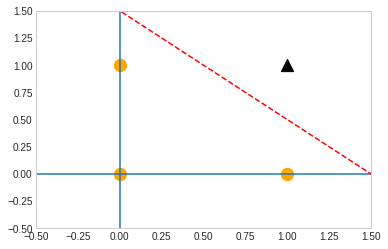

In [36]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = -0.6

y = (-0.4*x1 - bias) / 0.4

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y, 'r--')
plt.scatter(0, 0, color="orange", marker="o", s=150)
plt.scatter(0, 1, color="orange", marker="o", s=150)
plt.scatter(1, 0, color="orange", marker="o", s=150)
plt.scatter(1, 1, color="black", marker="^", s=150)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

OR 게이트를 만족시키는 가중치와 편향 구하기

In [37]:
def OR(a,b):
  input = np.array([a, b])
  weights = np.array([0.4, 0.5])
  bias = -0.3
  value = np.sum(input*weights) + bias

  if value <=0:
    return 0
  else:
    return 1

In [38]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


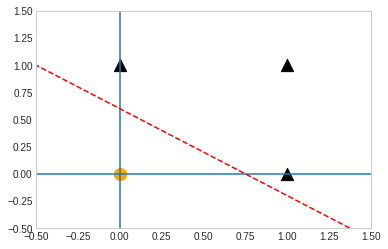

In [39]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = -0.3

y = (-0.4*x1 - bias) / 0.5

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y, 'r--')
plt.scatter(0, 0, color="orange", marker="o", s=150)
plt.scatter(0, 1, color="black", marker="^", s=150)
plt.scatter(1, 0, color="black", marker="^", s=150)
plt.scatter(1, 1, color="black", marker="^", s=150)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

NAND 게이트를 만족시키는 가중치와 편향 구하기

In [40]:
def NAND(a,b):
  input = np.array([a, b])
  weights = np.array([-0.6, -0.5])
  bias = 0.7
  value = np.sum(input*weights) + bias

  if value <=0:
    return 0
  else:
    return 1

In [41]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


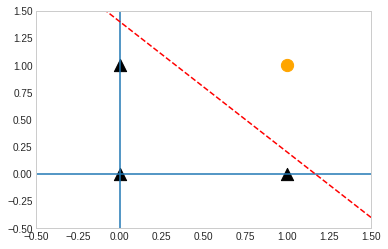

In [42]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = 0.7

y = (0.6*x1 - bias) / -0.5

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y, 'r--')
plt.scatter(0, 0, color="black", marker="^", s=150)
plt.scatter(0, 1, color="black", marker="^", s=150)
plt.scatter(1, 0, color="black", marker="^", s=150)
plt.scatter(1, 1, color="orange", marker="o", s=150)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

XOR 게이트

In [43]:
def XOR(x1,x2):
  s1 = NAND(x1, x2) # additional layer
  s2 = OR(x1, x2)   # additional layer
  y = AND(s1, s2)   # output layer
  return y

In [44]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


활성화 함수(Activation Function)

Step Function

In [45]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [46]:
def step_function_for_numpy(x):
  y = x > 0
  return y.astype(np.int)

In [48]:
print(step_function(-3))
print(step_function(5))

a = np.array([5, 3, -4, 2.0])
print(step_function_for_numpy(a))

0
1
[1 1 0 1]


Sigmoid Function(시그모이드 함수)
- Binary classification

In [49]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [50]:
print(sigmoid(3))
print(sigmoid(-3))

0.9525741268224334
0.04742587317756678


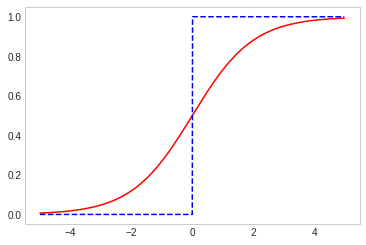

In [51]:
plt.grid()
x = np.arange(-5.0, 5.0, 0.01)
y1 = sigmoid(x)
y2 = step_function_for_numpy(x)
plt.plot(x, y1, 'r-', x, y2, 'b--')
plt.show()

ReLU(Rectified Linear Unit)

In [52]:
def ReLU(x):
  if x > 0:
    return x
  else:
    return 0

In [53]:
print(ReLU(5))
print(ReLU(-3))

5
0


tanh, Hyperbolic tangent function

In [54]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [55]:
print(tanh(3))
print(tanh(-3))

0.9950547536867306
-0.9950547536867306


Identify Function(항등 함수)

In [56]:
def identify_function(x):
  return x

In [57]:
print(identify_function(4))
print(identify_function(-1))
X = np.array([2, -3, 0.4])
print(identify_function(X))

4
-1
[ 2.  -3.   0.4]


Softmax
- Multi Class Classification

In [58]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [59]:
a = np.array([0.3, 0.2, 4.0, -1.2])
print(softmax(a))
print(np.sum(softmax(a)))

[0.02348781 0.02125265 0.9500187  0.00524084]
1.0


In [60]:
A = np.array([1000, 900, 1050, 500])
print(softmax(A))

[nan nan nan  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [63]:
def revised_softmax(a):
  C = np.max(a)
  return (np.exp(a-C) / np.sum(np.exp(a-C)))

In [64]:
A = np.array([1000, 900, 1050, 500])
print(revised_softmax(A))

[1.92874985e-022 7.17509597e-066 1.00000000e+000 1.37415257e-239]


LeakyReLU

In [65]:
def LeakyReLU(x):
  a = 0.01
  return np.maximum(a*x, x)

In [66]:
x = np.array([0.5, -1.4, 3, 0, 5])
print(LeakyReLU(x))

[ 0.5   -0.014  3.     0.     5.   ]


ELU(Exponential Linear Units)

In [67]:
def ELU(x):
  alpha = 1.0
  return (x > 0)*x + (x <= 0)*alpha*(np.exp(x)-1)

In [68]:
print(ELU(4))
print(ELU(-0.5))

x = np.array([-2, 0.1, 4])
print(ELU(x))

4.0
-0.3934693402873666
[-0.86466472  0.1         4.        ]


3-Layers

활성화 함수 정의

In [69]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

레이어 정의

In [80]:
X = np.array([1.0, 0.5, 0.4]) # input
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6], [0.3, 0.5, 0.7]])
B1 = np.array([1, 1, 1])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(3,)
(3, 3)
(3,)
[1.32 1.7  2.08]
[0.78918171 0.84553473 0.88894403]


In [81]:
W2 = np.array([[0.2, 0.4, 0.6], [0.1, 0.3, 0.5], [0.4, 0.6, 0.8]])
B2 = np.array([1, 1, 1])

print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3, 3)
(3,)
[1.59796743 2.10269952 2.60743162]
[0.83173411 0.89116528 0.93133834]


In [82]:
W3 = np.array([[0.1, 0.3], [-0.1, -0.5], [0.3, 0.5]])
B3 = np.array([1, 1])

print(W3.shape)
print(B3.shape)

A3 = np.dot(Z2, W3) + B3
Z3 = sigmoid(A3)

print(A3)
print(Z3)

(3, 2)
(2,)
[1.27345838 1.26960676]
[0.78133419 0.78067542]


In [83]:
W4 = np.array([[0.1, 0.2], [0.3, 0.5]])
B4 = np.array([1, 1])

print(W4.shape)
print(B4.shape)

A4 = np.dot(Z3, W4) + B4
Y = sigmoid(A4)

print(A4)
print(Y)

(2, 2)
(2,)
[1.31233605 1.54660455]
[0.7879038  0.82442278]


In [76]:
def network():

  network = {}

  # 첫번째 레이어
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6], [0.3, 0.5, 0.7]])
  network['B1'] = np.array([1, 1, 1])

  # 두번째 레이어
  network['W2'] = np.array([[0.2, 0.4, 0.6], [0.1, 0.3, 0.5], [0.4, 0.6, 0.8]])
  network['B2'] = np.array([1, 1, 1])

  # 세번째 레이어
  network['W3'] = np.array([[0.1, 0.3], [-0.1, -0.5], [0.3, 0.5]])
  network['B3'] = np.array([1, 1])

  # 네번째 레이어
  network['W4'] = np.array([[0.1, 0.2], [0.3, 0.5]])
  network['B4'] = np.array([1, 1])

  return network

In [78]:
def forward(network, x):
  W1, W2, W3, W4 = network['W1'], network['W2'], network['W3'], network['W4']
  B1, B2, B3, B4 = network['B1'], network['B2'], network['B3'], network['B4']

  A1 = np.dot(x, W1) + B1
  Z1 = sigmoid(A1)

  A2 = np.dot(Z1, W2) + B2
  Z2 = sigmoid(A2)

  A3 = np.dot(Z2, W3) + B3
  Z3 = sigmoid(A3)

  A4 = np.dot(Z3, W4) + B4
  y = sigmoid(A4)

  return y

In [84]:
net = network()
# x = np.array([0.3, 1.3, -2.2])
x = np.array([1.0, 0.5, 0.4])
y = forward(net, x)
print(y)

[0.7879038  0.82442278]
